# Notebook Principal - Analyse Accidentologie

### 1. Importer les modules

In [1]:
import pandas as pd

from fras.data.data_loader import load_data
from fras.data.data_annotation import ATM_MAPPING, CATV_MAPPING
from fras.analysis.hypotheses_visuals import (
    print_hypotheses,
    plot_accidents_by_year,
    plot_severity_by_year,
    plot_sex_distribution,
    plot_age_distribution,
    plot_weather_conditions,
    plot_vehicle_categories,
    plot_accidents_by_hour,
    plot_accidents_by_zone
)


/home/goamegah/Documents/workspace/develop/esgi/4a/s2/reporting/dataset


### 2. Chargement et préparation des données (ex: 2019-2023)

In [2]:
df_2023 = load_data(2023)
df_2023

Already downloaded: 104dbb32-704f-4e99-a71e-43563cb604f2.csv
Already downloaded: 8bef19bf-a5e4-46b3-b5f9-a145da4686bc.csv
Already downloaded: 146a42f5-19f0-4b3e-a887-5cd8fbef057b.csv
Already downloaded: 68848e2a-28dd-4efc-9d5f-d512f7dbe66f.csv


,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,zone
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,1.0,1978.0,5.0,2.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
1,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,1.0,1978.0,5.0,2.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
2,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,2.0,1997.0,9.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
3,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,1.0,1997.0,9.0,0.0,-1.0,-1.0,2.0,3,1.0,Métropole
4,202300000003,7,5,2023,20:50,1,94,94022,2,3,...,1.0,1987.0,0.0,2.0,6.0,0.0,0.0,0,-1.0,Métropole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163729,202300054821,26,10,2023,17:20,1,973,97302,1,6,...,1.0,1971.0,1.0,2.0,0.0,-1.0,0.0,0,-1.0,Outre-Mer
163730,202300054821,26,10,2023,17:20,1,973,97302,1,6,...,2.0,1968.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,Outre-Mer
163731,202300054822,20,10,2023,16:30,1,69,69387,2,1,...,2.0,2003.0,2.0,1.0,-1.0,-1.0,-1.0,-1,-1.0,Métropole
163732,202300054822,20,10,2023,16:30,1,69,69387,2,1,...,2.0,2002.0,1.0,1.0,-1.0,-1.0,-1.0,-1,-1.0,Métropole


In [3]:
df_2022 = load_data(2022)
df_2022

Already downloaded: 5fc299c0-4598-4c29-b74c-6a67b0cc27e7.csv
Already downloaded: a6ef711a-1f03-44cb-921a-0ce8ec975995.csv
Already downloaded: c9742921-4427-41e5-81bc-f13af8bc31a0.csv
Already downloaded: 62c20524-d442-46f5-bfd8-982c59763ec8.csv


,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,zone
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,...,1,2008.0,5,2,8,-1,-1,-1,-1,Métropole
1,202200000001,19,10,2022,16:15,1,26,26198,2,3,...,1,1948.0,5,1,8,-1,-1,-1,-1,Métropole
2,202200000002,20,10,2022,08:34,1,25,25204,2,3,...,1,1988.0,9,1,0,-1,0,0,-1,Métropole
3,202200000002,20,10,2022,08:34,1,25,25204,2,3,...,1,1970.0,4,1,0,-1,0,0,-1,Métropole
4,202200000003,20,10,2022,17:15,1,22,22360,2,6,...,1,2002.0,0,1,0,-1,-1,-1,-1,Métropole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,202200055301,1,1,2022,08:40,1,81,81099,1,3,...,2,2002.0,5,1,-1,-1,0,0,-1,Métropole
126658,202200055301,1,1,2022,08:40,1,81,81099,1,3,...,2,2004.0,5,1,-1,-1,0,0,-1,Métropole
126659,202200055301,1,1,2022,08:40,1,81,81099,1,3,...,2,1953.0,5,1,-1,-1,0,0,-1,Métropole
126660,202200055302,1,3,2022,16:55,1,41,41018,2,1,...,1,1992.0,1,2,6,-1,-1,-1,-1,Métropole


In [4]:
df_2021 = load_data(2021)
df_2021

Already downloaded: 85cfdc0c-23e4-4674-9bcd-79a970d7269b.csv
Already downloaded: 8a4935aa-38cd-43af-bf10-0209d6d17434.csv
Already downloaded: 0bb5953a-25d8-46f8-8c25-b5c2f5ba905e.csv
Already downloaded: ba5a1956-7e82-41b7-a602-89d7dd484d7a.csv


,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,zone
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,...,1.0,2000.0,1.0,0.0,9.0,-1.0,0.0,0,-1.0,Métropole
1,202100000001,30,11,2021,07:32,2,30,30319,1,1,...,1.0,1978.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0,Métropole
2,202100000002,25,9,2021,14:20,1,51,51544,1,3,...,1.0,1983.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,Métropole
3,202100000002,25,9,2021,14:20,1,51,51544,1,3,...,1.0,1993.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,Métropole
4,202100000003,15,7,2021,07:55,1,85,85048,2,1,...,1.0,1995.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,Métropole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129249,202100056516,1,1,2021,18:00,3,26,26064,1,1,...,1.0,1975.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,Métropole
129250,202100056516,1,1,2021,18:00,3,26,26064,1,1,...,1.0,2002.0,5.0,1.0,-1.0,-1.0,0.0,0,-1.0,Métropole
129251,202100056517,1,1,2021,10:55,1,33,33003,1,2,...,1.0,1999.0,0.0,0.0,-1.0,-1.0,0.0,0,-1.0,Métropole
129252,202100056518,2,1,2021,18:00,3,78,78423,1,1,...,1.0,1968.0,3.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole


In [5]:
df_2020 = load_data(2020)
df_2020

Already downloaded: 07a88205-83c1-4123-a993-cba5331e8ae0.csv
Already downloaded: e85c41f7-d4ea-4faf-877f-ab69a620ce21.csv
Already downloaded: a66be22f-c346-49af-b196-71df24702250.csv
Already downloaded: 78c45763-d170-4d51-a881-e3147802d7ee.csv


,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,zone
0,202000000001,7,3,2020,16:55,1,91,91657,2,3,...,1.0,1983.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
1,202000000001,7,3,2020,16:55,1,91,91657,2,3,...,1.0,1982.0,5.0,2.0,6.0,-1.0,-1.0,-1,-1.0,Métropole
2,202000000002,7,3,2020,08:35,2,91,91657,2,9,...,1.0,1997.0,1.0,8.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
3,202000000002,7,3,2020,08:35,2,91,91657,2,9,...,1.0,1967.0,5.0,0.0,-1.0,-1.0,3.0,3,1.0,Métropole
4,202000000003,7,3,2020,13:30,1,91,91174,2,2,...,1.0,1985.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107189,202000047743,28,11,2020,11:45,1,05,05061,1,1,...,1.0,2011.0,5.0,1.0,0.0,-1.0,0.0,0,-1.0,Métropole
107190,202000047743,28,11,2020,11:45,1,05,05061,1,1,...,2.0,1981.0,5.0,1.0,0.0,-1.0,0.0,0,-1.0,Métropole
107191,202000047743,28,11,2020,11:45,1,05,05061,1,1,...,1.0,1998.0,9.0,1.0,0.0,-1.0,0.0,0,-1.0,Métropole
107192,202000047744,18,11,2020,17:44,4,05,05061,2,1,...,1.0,1967.0,9.0,2.0,0.0,-1.0,-1.0,-1,-1.0,Métropole


In [6]:
df_2019 = load_data(2019)
df_2019

Already downloaded: e22ba475-45a3-46ac-a0f7-9ca9ed1e283a.csv
Already downloaded: 2ad65965-36a1-4452-9c08-61a6c874e3e6.csv
Already downloaded: 780cd335-5048-4bd6-a841-105b44eb2667.csv
Already downloaded: 36b1b7b3-84b4-4901-9163-59ae8a9e3028.csv


,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,zone
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,2.0,2002.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
1,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,2.0,1993.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
2,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,1.0,1959.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
3,201900000002,30,11,2019,02:50,3,93,93066,1,1,...,2.0,1994.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
4,201900000003,28,11,2019,15:15,1,92,92036,1,1,...,1.0,1996.0,0.0,1.0,0.0,-1.0,-1.0,0,-1.0,Métropole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135012,201900058837,27,11,2019,07:50,1,67,67482,1,1,...,2.0,1988.0,1.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
135013,201900058838,30,11,2019,02:41,4,94,94021,1,1,...,1.0,1998.0,9.0,1.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
135014,201900058839,30,11,2019,15:20,1,78,78640,1,1,...,1.0,1979.0,0.0,2.0,0.0,-1.0,-1.0,-1,-1.0,Métropole
135015,201900058840,29,11,2019,20:50,3,92,92047,1,1,...,1.0,1974.0,0.0,1.0,0.0,-1.0,-1.0,0,-1.0,Métropole


In [7]:
df_2023.columns

Index(['num_acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'id_usager',
       'num_veh_y', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
       'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'zone'],
      dtype='object')

In [8]:
df_2022.columns

Index(['num_acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'id_usager',
       'num_veh_y', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
       'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'zone'],
      dtype='object')

In [9]:
df_2021.columns

Index(['num_acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'id_usager',
       'num_veh_y', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
       'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'zone'],
      dtype='object')

In [10]:
df_2020.columns

Index(['num_acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'num_veh_y',
       'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2',
       'secu3', 'locp', 'actp', 'etatp', 'zone'],
      dtype='object')

In [11]:
df_2019.columns

Index(['num_acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'num_veh_y',
       'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2',
       'secu3', 'locp', 'actp', 'etatp', 'zone'],
      dtype='object')

In [12]:
from  fras.data.data_cleaner import clean_dataset

In [13]:
df_2023_clean = clean_dataset(df=df_2023, dup_subset=['num_acc'])
df_2023_clean

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,202300000001,7,5,2023,0600,1,75,75101,2,4,...,5.0,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,6,0
1,202300000002,7,5,2023,0530,5,94,94080,2,1,...,9.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,5,30
2,202300000003,7,5,2023,2050,1,94,94022,2,3,...,<NA>,2.0,6.0,<NA>,<NA>,<NA>,<NA>,Métropole,20,50
3,202300000004,6,5,2023,2357,5,94,94078,2,1,...,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,23,57
4,202300000005,7,5,2023,0050,5,94,94068,2,2,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54817,202300054818,26,10,2023,2045,5,974,97416,2,1,...,5.0,1.0,7.0,<NA>,<NA>,<NA>,<NA>,Outre-Mer,20,45
54818,202300054819,26,10,2023,1910,3,974,97416,1,1,...,<NA>,8.0,<NA>,<NA>,<NA>,<NA>,<NA>,Outre-Mer,19,10
54819,202300054820,26,10,2023,0940,1,974,97411,2,1,...,5.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Outre-Mer,9,40
54820,202300054821,26,10,2023,1720,1,973,97302,1,6,...,1.0,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,Outre-Mer,17,20


In [14]:
df_2022_clean = clean_dataset(df=df_2022, dup_subset=['num_acc'])
df_2022_clean

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,202200000001,19,10,2022,1615,1,26,26198,2,3,...,5,2,8,<NA>,<NA>,<NA>,<NA>,Métropole,16,15
1,202200000002,20,10,2022,0834,1,25,25204,2,3,...,9,1,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,8,34
2,202200000003,20,10,2022,1715,1,22,22360,2,6,...,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,17,15
3,202200000004,20,10,2022,1800,1,16,16102,2,3,...,<NA>,1,8,<NA>,<NA>,<NA>,<NA>,Métropole,18,0
4,202200000005,19,10,2022,1145,1,13,13103,1,1,...,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,11,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,202200055298,1,1,2022,0350,3,2B,2B293,1,1,...,9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,50
55298,202200055299,1,1,2022,0720,3,84,84074,1,1,...,5,1,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,7,20
55299,202200055300,1,1,2022,0427,3,74,74001,1,1,...,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,4,27
55300,202200055301,1,1,2022,0840,1,81,81099,1,3,...,5,1,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,8,40


In [15]:
df_2021_clean = clean_dataset(df=df_2021, dup_subset=['num_acc'])
df_2021_clean

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,202100000001,30,11,2021,0732,2,30,30319,1,1,...,1.0,<NA>,9.0,<NA>,<NA>,<NA>,<NA>,Métropole,7,32
1,202100000002,25,9,2021,1420,1,51,51544,1,3,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,14,20
2,202100000003,15,7,2021,0755,1,85,85048,2,1,...,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,7,55
3,202100000004,27,3,2021,1945,5,93,93005,2,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,19,45
4,202100000005,25,2,2021,0720,5,76,76429,2,1,...,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,2021,0610,3,33,33021,1,1,...,5.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,6,10
56514,202100056515,1,1,2021,1020,1,38,38405,1,1,...,5.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,10,20
56515,202100056516,1,1,2021,1800,3,26,26064,1,1,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,18,0
56516,202100056517,1,1,2021,1055,1,33,33003,1,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,10,55


In [16]:
df_2020_clean = clean_dataset(df=df_2020, dup_subset=['num_acc'])
df_2020_clean

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,202000000001,7,3,2020,1655,1,91,91657,2,3,...,5.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,16,55
1,202000000002,7,3,2020,0835,2,91,91657,2,9,...,1.0,8.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,8,35
2,202000000003,7,3,2020,1330,1,91,91174,2,2,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,13,30
3,202000000004,7,3,2020,1850,5,91,91215,2,1,...,5.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,18,50
4,202000000005,7,3,2020,1100,1,77,77181,1,6,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,202000047740,30,11,2020,0750,1,13,13028,2,1,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,7,50
47740,202000047741,30,11,2020,1700,2,06,06083,2,1,...,4.0,8.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,17,0
47741,202000047742,1,12,2020,1000,1,06,06069,2,1,...,9.0,1.0,8.0,<NA>,<NA>,<NA>,<NA>,Métropole,10,0
47742,202000047743,28,11,2020,1145,1,05,05061,1,1,...,5.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,11,45


In [17]:
df_2019_clean = clean_dataset(df=df_2019, dup_subset=['num_acc'])
df_2019_clean

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,201900000001,30,11,2019,0130,4,93,93053,1,1,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,1,30
1,201900000002,30,11,2019,0250,3,93,93066,1,1,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,2,50
2,201900000003,28,11,2019,1515,1,92,92036,1,1,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,15,15
3,201900000004,30,11,2019,2020,5,94,94069,1,1,...,<NA>,1.0,8.0,<NA>,<NA>,<NA>,<NA>,Métropole,20,20
4,201900000005,30,11,2019,0400,3,94,94028,1,1,...,5.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,30,11,2019,0900,1,69,69288,1,1,...,4.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,9,0
58836,201900058837,27,11,2019,0750,1,67,67482,1,1,...,1.0,1.0,4.0,<NA>,<NA>,<NA>,<NA>,Métropole,7,50
58837,201900058838,30,11,2019,0241,4,94,94021,1,1,...,9.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,2,41
58838,201900058839,30,11,2019,1520,1,78,78640,1,1,...,<NA>,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,15,20


In [18]:
from fras.data.data_loader import merge_years

In [19]:
df_all = merge_years([df_2023_clean, df_2022_clean, df_2021_clean, df_2020_clean, df_2019_clean])
df_all

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,202300000001,7,5,2023,0600,1,75,75101,2,4,...,5.0,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,6,0
1,202300000002,7,5,2023,0530,5,94,94080,2,1,...,9.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,5,30
2,202300000003,7,5,2023,2050,1,94,94022,2,3,...,<NA>,2.0,6.0,<NA>,<NA>,<NA>,<NA>,Métropole,20,50
3,202300000004,6,5,2023,2357,5,94,94078,2,1,...,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,23,57
4,202300000005,7,5,2023,0050,5,94,94068,2,2,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273221,201900058836,30,11,2019,0900,1,69,69288,1,1,...,4.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,9,0
273222,201900058837,27,11,2019,0750,1,67,67482,1,1,...,1.0,1.0,4.0,<NA>,<NA>,<NA>,<NA>,Métropole,7,50
273223,201900058838,30,11,2019,0241,4,94,94021,1,1,...,9.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,2,41
273224,201900058839,30,11,2019,1520,1,78,78640,1,1,...,<NA>,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,15,20


In [20]:
df_all.columns

Index(['num_acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'id_usager',
       'num_veh_y', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
       'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'zone', 'heure',
       'minute'],
      dtype='object')

### 3. Exploration rapide

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273226 entries, 0 to 273225
Data columns (total 59 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   num_acc      273226 non-null  object 
 1   jour         273226 non-null  Int64  
 2   mois         273226 non-null  Int64  
 3   an           273226 non-null  Int64  
 4   hrmn         273226 non-null  object 
 5   lum          273217 non-null  Int64  
 6   dep          273226 non-null  object 
 7   com          273226 non-null  object 
 8   agg          273226 non-null  Int64  
 9   int          273212 non-null  Int64  
 10  atm          273200 non-null  Int64  
 11  col          271613 non-null  Int64  
 12  adr          269247 non-null  object 
 13  lat          273226 non-null  object 
 14  long         273226 non-null  object 
 15  catr         273226 non-null  Int64  
 16  voie         242817 non-null  object 
 17  v1           640 non-null     Float64
 18  v2           22852 non-n

In [22]:
df_all.describe(include='all')

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
count,273226,273226.0,273226.0,273226.0,273226,273217.0,273226,273226,273226.0,273212.0,...,198070.0,243081.0,66155.0,3527.0,22567.0,22658,22601.0,270445,273226.000000,273226.000000
unique,273226,<NA>,<NA>,<NA>,1440,<NA>,116,22984,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,11,<NA>,2,NaN,NaN
top,201900058840,<NA>,<NA>,<NA>,1800,<NA>,75,75116,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,Métropole,NaN,NaN
freq,1,<NA>,<NA>,<NA>,3543,<NA>,25239,2655,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,16808,<NA>,258361,NaN,NaN
mean,NaN,15.616962,6.72503,2020.998251,NaN,1.917692,NaN,NaN,1.638548,2.062234,...,4.322023,2.291915,6.670259,8.372555,3.237249,NaN,1.228397,NaN,13.472448,25.941265
std,NaN,8.734016,3.364622,1.428688,NaN,1.48485,NaN,NaN,0.480422,2.007063,...,2.277401,2.418181,1.354267,1.700527,1.907176,NaN,0.484495,NaN,5.504873,17.484909
min,NaN,1.0,1.0,2019.0,NaN,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0.000000,0.000000
25%,NaN,8.0,4.0,2020.0,NaN,1.0,NaN,NaN,1.0,1.0,...,3.0,1.0,6.0,9.0,2.0,NaN,1.0,NaN,9.000000,10.000000
50%,NaN,16.0,7.0,2021.0,NaN,1.0,NaN,NaN,2.0,1.0,...,5.0,1.0,6.0,9.0,3.0,NaN,1.0,NaN,14.000000,28.000000
75%,NaN,23.0,10.0,2022.0,NaN,3.0,NaN,NaN,2.0,2.0,...,5.0,2.0,8.0,9.0,4.0,NaN,1.0,NaN,18.000000,40.000000


In [23]:
df_all.head()

,num_acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,trajet,secu1,secu2,secu3,locp,actp,etatp,zone,heure,minute
0,202300000001,7,5,2023,0600,1,75,75101,2,4,...,5.0,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,6,0
1,202300000002,7,5,2023,0530,5,94,94080,2,1,...,9.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,5,30
2,202300000003,7,5,2023,2050,1,94,94022,2,3,...,<NA>,2.0,6.0,<NA>,<NA>,<NA>,<NA>,Métropole,20,50
3,202300000004,6,5,2023,2357,5,94,94078,2,1,...,1.0,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,23,57
4,202300000005,7,5,2023,0050,5,94,94068,2,2,...,<NA>,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,Métropole,0,50


### Hypothèses de travail 

In [24]:
print_hypotheses()

- H1 : Le nombre d'accidents corporels a chuté en 2020 à cause du Covid (confinements)
- H2 : Les accidents sont majoritairement causés par des conducteurs masculins
- H3 : Les deux-roues (scooters, motos) sont surreprésentés parmi les accidents graves
- H4 : Les conditions météo (pluie forte, neige) augmentent la gravité des accidents
- H5 : Il y a plus d'accidents aux heures de pointe (8h-9h, 17h-19h)
- H6 : La part des accidents graves est plus élevée en Outre-Mer qu'en Métropole


### 5. Visualisations 

#### Accidents par année

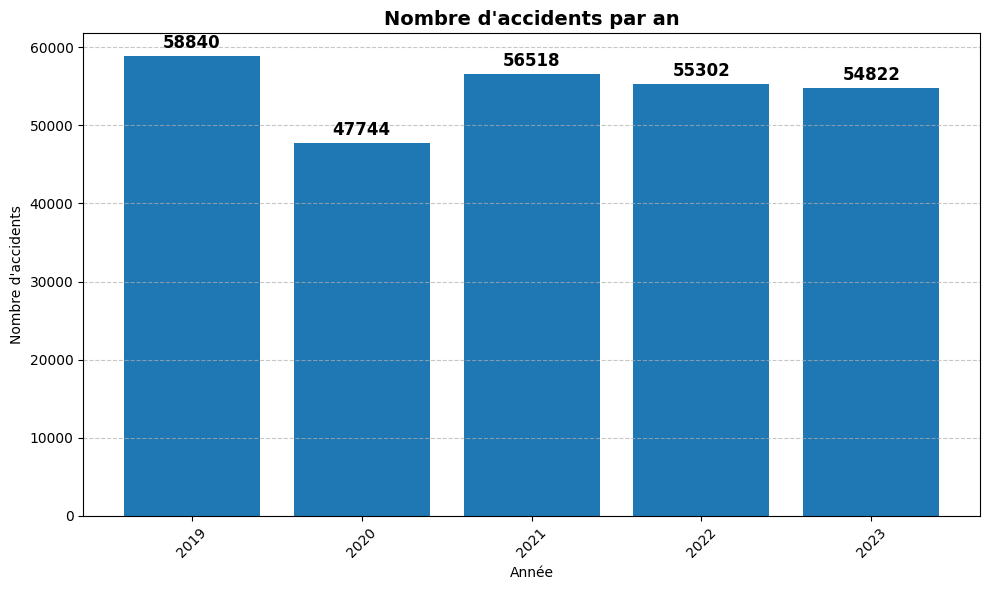

In [25]:
plot_accidents_by_year(df_all)

#### Gravité par année

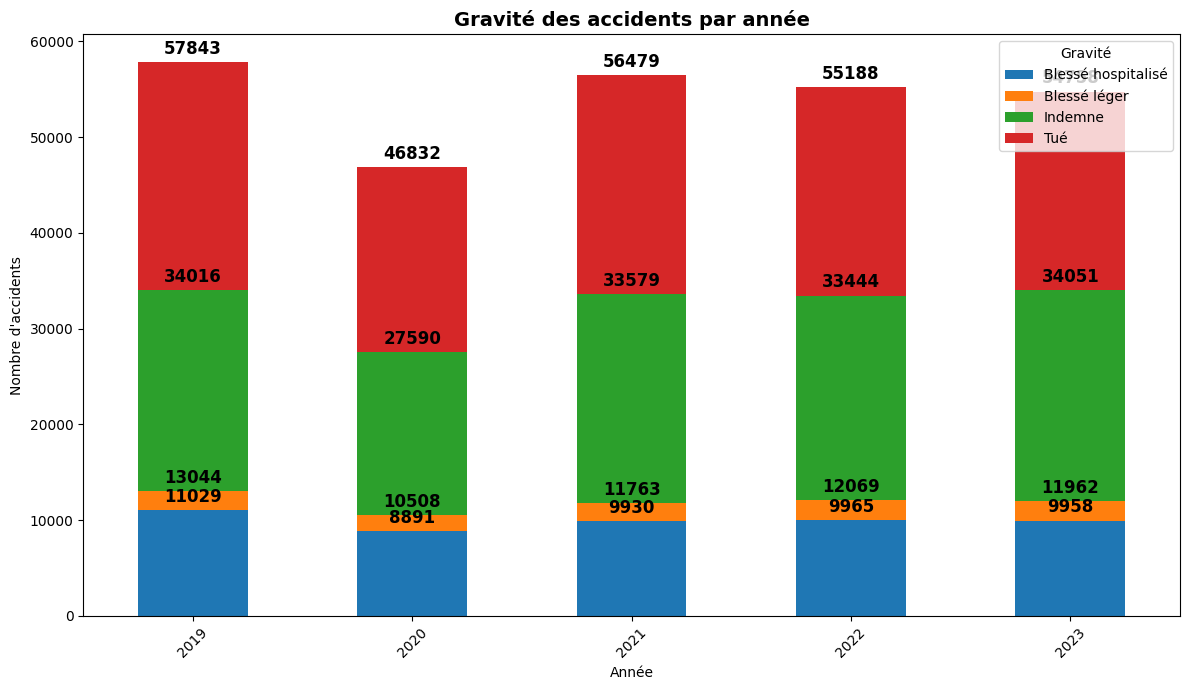

In [26]:
plot_severity_by_year(df_all)

#### Répartition hommes / femmes

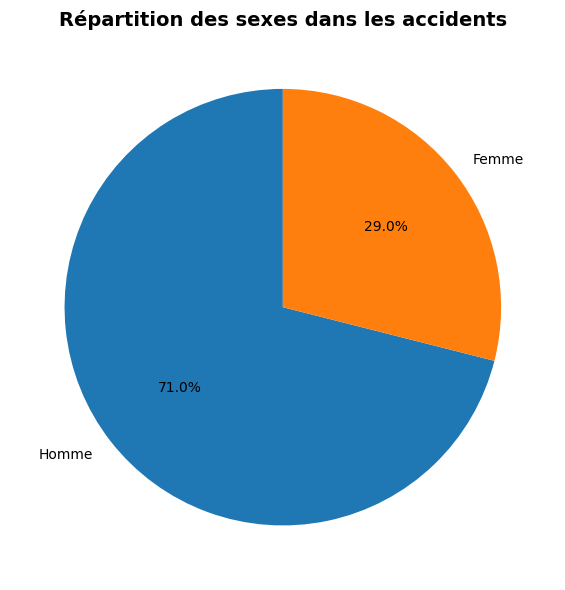

In [27]:
plot_sex_distribution(df_all)

#### Répartition par tranche d'âge

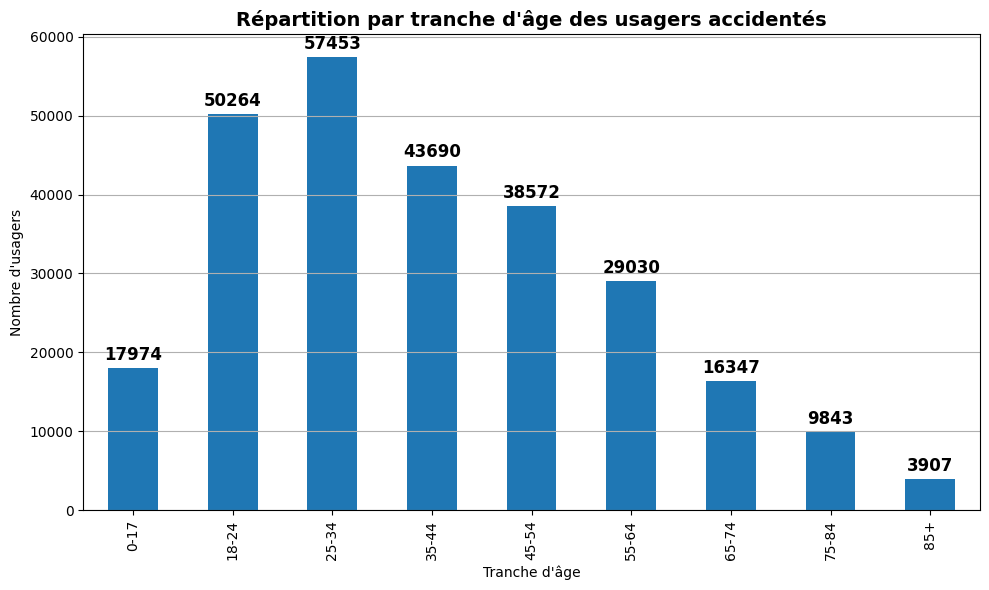

In [28]:
plot_age_distribution(df_all)

#### Conditions météorologiques

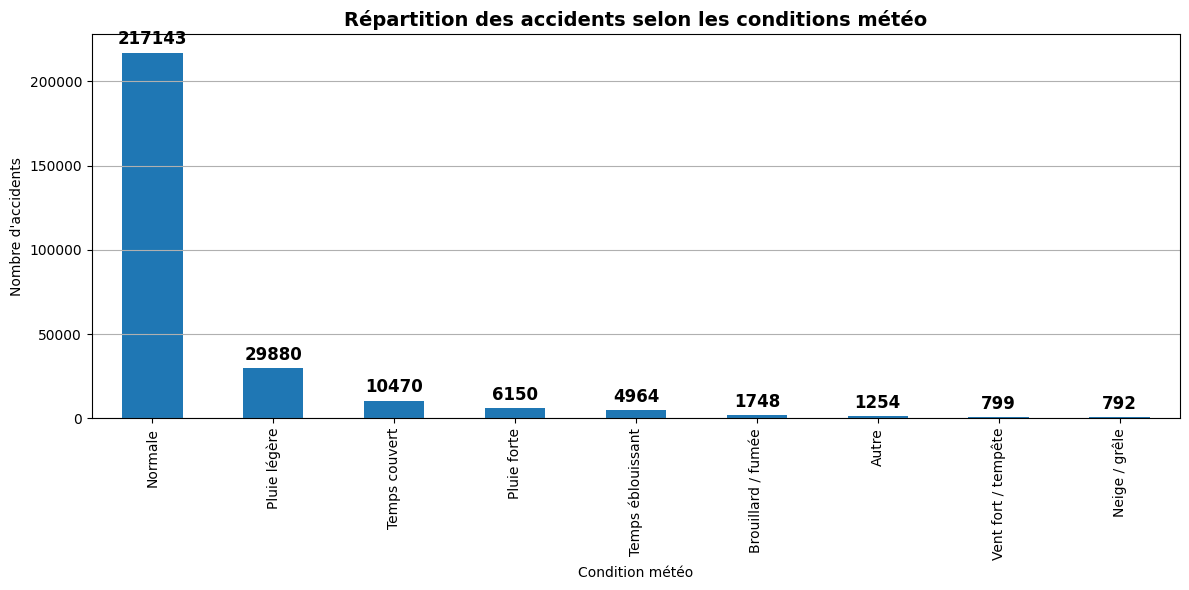

In [29]:
plot_weather_conditions(df_all, ATM_MAPPING)

#### Catégories de véhicules

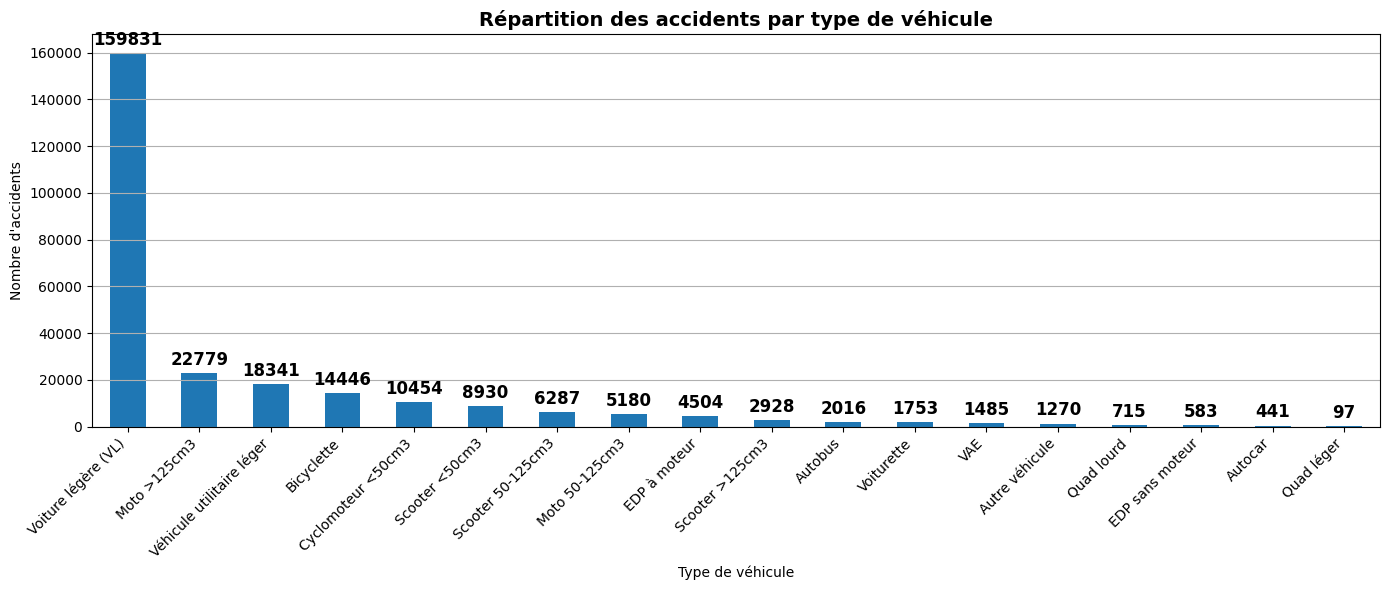

In [30]:
plot_vehicle_categories(df_all, CATV_MAPPING)


#### Accidents par heure de la journée

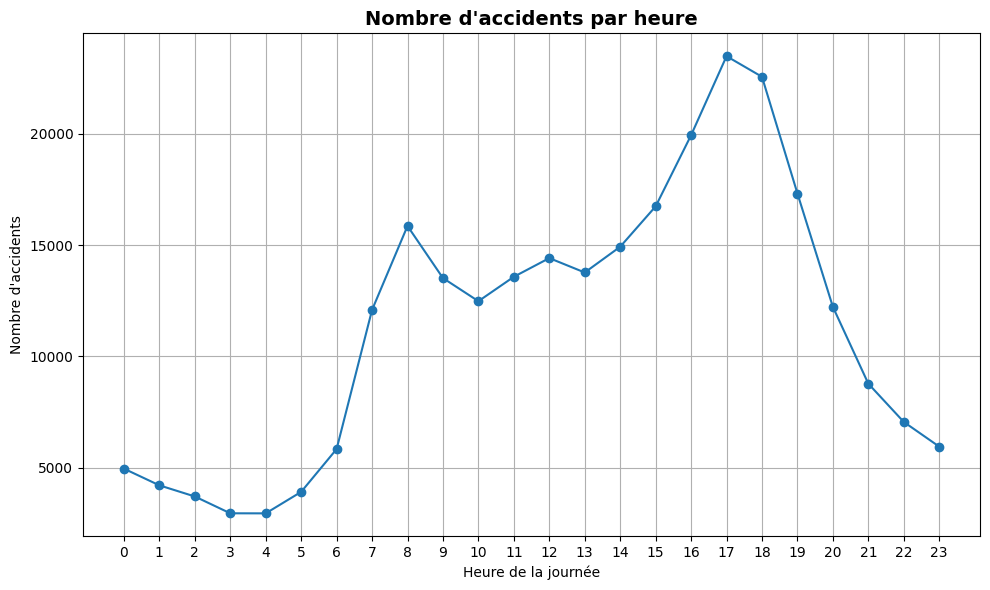

In [31]:
plot_accidents_by_hour(df_all)

#### Accidents Métropole vs Outre-Mer

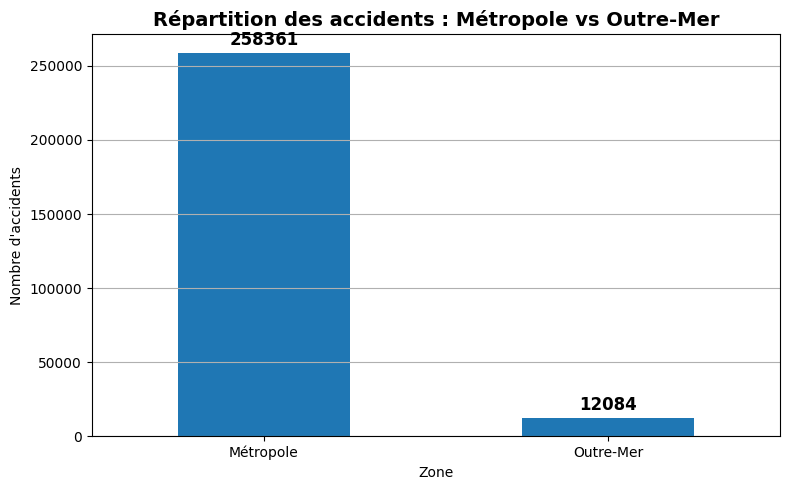

In [32]:
plot_accidents_by_zone(df_all)

In [33]:
import folium
from folium.plugins import MarkerCluster

def plot_accidents_map_by_severity(df, sample_size=1000):
    """
    Carte Folium avec des couleurs selon la gravité de l'accident.
    - 1 : Indemne → vert
    - 2 : Blessé léger → orange
    - 3 : Blessé hospitalisé → rouge
    - 4 : Tué → noir
    """
    df_map = df.dropna(subset=["lat", "long", "grav"]).sample(min(sample_size, len(df)), random_state=1)

    # Dictionnaire couleur selon gravité
    severity_colors = {
        1: 'green',
        2: 'orange',
        3: 'red',
        4: 'black'
    }

    m = folium.Map(location=[46.6034, 1.8883], zoom_start=6)
    marker_cluster = MarkerCluster().add_to(m)

    for _, row in df_map.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=3,
            color=severity_colors.get(row['grav'], 'gray'),
            fill=True,
            fill_opacity=0.7
        ).add_to(marker_cluster)

    return m


In [34]:
# Correction des latitudes et longitudes
def clean_lat_long(df):
    """
    Nettoie les colonnes lat et long : remplace ',' par '.' puis convertit en float.
    """
    df = df.copy()
    for col in ['lat', 'long']:
        if col in df.columns:
            df[col] = (df[col]
                       .astype(str)
                       .str.replace(',', '.', regex=False)
                       .astype(float))
    return df


In [35]:
# À utiliser avant les visualisations
df_all_clean_maps = clean_lat_long(df_all)

In [36]:
# Exemple d'utilisation
plot_accidents_map_by_severity(df_all_clean_maps)

#### 6. Analyse et Conclusions ✍️

- Impact du COVID en 2020 sur la baisse du trafic et des accidents ?
- Plus d'accidents la nuit ? Le matin ?
- Les jeunes 18-24 ans : plus exposés ?
- Types de véhicules impliqués : scooters, VL, poids lourds ?
- Plus d'accidents sous la pluie ?
- Différences Métropole / Outre-Mer ?

In [ ]:
# 1. Total d'accidents (distinct par num_acc)
total_accidents = df_all['num_acc'].nunique()

# 2. Nombre d'accidents par année
accidents_by_year = df_all.groupby('an')['num_acc'].nunique().sort_index()

# 3. Baisse de 2020 par rapport à 2019
try:
    baisse_2020_vs_2019 = 100 * (1 - accidents_by_year[2020] / accidents_by_year[2019])
except KeyError:
    baisse_2020_vs_2019 = None  # Si les années manquent

# 4. Répartition Hommes / Femmes
sexe_counts = df_all['sexe'].value_counts(normalize=True) * 100
pourcentage_hommes = sexe_counts.get(1, 0)
pourcentage_femmes = sexe_counts.get(2, 0)

# 5. Répartition Métropole / Outre-Mer
zone_counts = df_all['zone'].value_counts(normalize=True) * 100
pourcentage_metropole = zone_counts.get('Métropole', 0)
pourcentage_outremer = zone_counts.get('Outre-Mer', 0)

# Résumé des KPI
kpi_summary = {
    'Total accidents': total_accidents,
    'Baisse 2020 vs 2019 (%)': round(baisse_2020_vs_2019, 2) if baisse_2020_vs_2019 is not None else "Données manquantes",
    'Répartition Hommes (%)': round(pourcentage_hommes, 2),
    'Répartition Femmes (%)': round(pourcentage_femmes, 2),
    'Accidents Métropole (%)': round(pourcentage_metropole, 2),
    'Accidents Outre-Mer (%)': round(pourcentage_outremer, 2)
}

# Affichage propre
for k, v in kpi_summary.items():
    print(f"{k}: {v}")


Total accidents: 273226
Baisse 2020 (%): 18.86
Répartition Hommes (%): 71.05
Répartition Femmes (%): 28.95
Accidents Métropole (%): 95.53
Accidents Outre-Mer (%): 4.47


In [38]:
# Résumé des KPI (repris du message précédent)
kpi_df = pd.DataFrame.from_dict(kpi_summary, orient='index', columns=['Valeur'])

# Affichage
display(kpi_df)

,Valeur
Total accidents,273226.00
Baisse 2020 (%),18.86
Répartition Hommes (%),71.05
Répartition Femmes (%),28.95
Accidents Métropole (%),95.53
Accidents Outre-Mer (%),4.47
